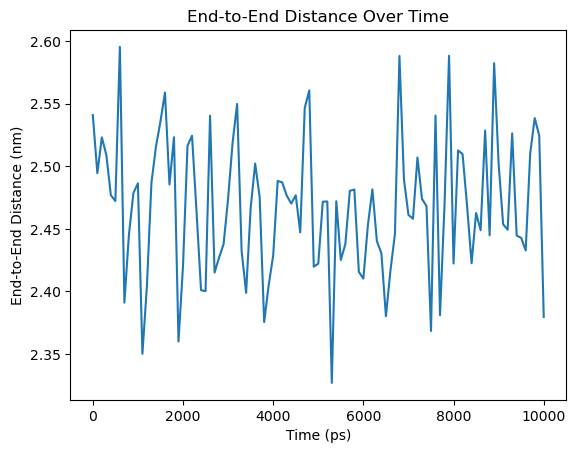

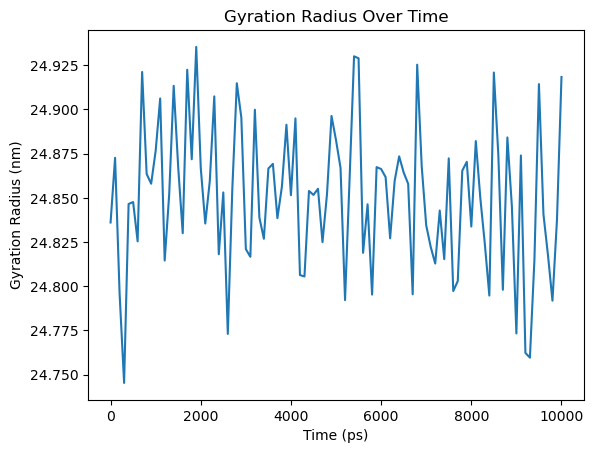

In [7]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances
import matplotlib.pyplot as plt
import numpy as np

# Step 1: 加载合并后的轨迹文件
u = mda.Universe("step5_5.gro", "merged.xtc")

# Step 2: 选择分子的末端原子 (假设为N和C)
atom_start = u.select_atoms("name N")  # 起始末端
atom_end = u.select_atoms("name C")    # 末端

# Step 3: 计算末端-末端距离
distances_list = []
times = []  # 保存每一帧的时间
for ts in u.trajectory:
    dist = distances.distance_array(atom_start.positions, atom_end.positions)[0, 0]
    distances_list.append(dist)
    times.append(u.trajectory.time)  # 获取每一帧的时间

# 绘制末端-末端距离随时间的变化
plt.plot(times, distances_list)  # 使用手动存储的时间
plt.xlabel('Time (ps)')
plt.ylabel('End-to-End Distance (nm)')
plt.title('End-to-End Distance Over Time')
plt.show()

# Step 4: 手动计算旋转半径
def calc_radius_of_gyration(positions):
    # 计算质心
    center_of_mass = np.mean(positions, axis=0)
    # 计算到质心的距离平方
    rg_squared = np.sum((positions - center_of_mass) ** 2) / len(positions)
    return np.sqrt(rg_squared)

# 保存旋转半径随时间的变化
rg_list = []
for ts in u.trajectory:
    rg = calc_radius_of_gyration(u.select_atoms('all').positions)
    rg_list.append(rg)

# 绘制旋转半径随时间的变化
plt.plot(times, rg_list)
plt.xlabel('Time (ps)')
plt.ylabel('Gyration Radius (nm)')
plt.title('Gyration Radius Over Time')
plt.show()